In [36]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import os
import glob
import pandas as pd
import plotly.express as px

# Load & Clean Data

## Import data

L'idée est de faire un script global permettant de lire, concatener et créer un seul DataFrame pour chaque jeu de données récoltées.

Chaque fichier XLSX contient plusieurs lignes explicatives au début, alors nous les retirons lors de la lecture des fichier. Les fichier excel ont aussi une feuille par région

Nous analysons d'abord la srtucture des fichiers xlsl pour pouvoir ensuite les organiser en dataframe

In [39]:
path = os.path.join("..", "..", "data", "all", "2018-3-5", "irecomicroent2018_1_perennite_xlsx")

files = files = [f for f in os.listdir(path) if f.endswith((".xls", ".xlsx"))]


df_list = []

for f in files:
    file_path = os.path.join(path, f)
    xls = pd.ExcelFile(file_path)
    
    #define the shape of the DF
    for sheet in xls.sheet_names:

        #remove useless lignes
        data = pd.read_excel(xls, sheet_name=sheet, skiprows=5)
        data = data.iloc[:-4]
        categorie_type = data.iloc[0, 1]

        data = data.iloc[1:, :]

        #renames columns
        data = data.rename(columns={
            data.columns[0]: "gender",
            data.columns[1]: "categories",
            data.columns[2]: "years"
        })

        data[["gender", "categories", "years"]] = data[["gender", "categories", "years"]].ffill()

        data["file_name"] = f
        data["area"] = sheet
        data["categorie_type"] = categorie_type
        df_list.append(data)

df = pd.concat(df_list, ignore_index=True)

df = df[['gender', 'categorie_type'] + [col for col in df.columns if col not in ['gender', 'categorie_type']]]

In [40]:
df

,gender,categorie_type,categories,years,Taux de pérennité (%),Borne inférieure du taux de\npérennité,Borne supérieure du taux de\npérennité,Nature des bornes,file_name,area
0,Ensemble,Tranche d’âge du créateur en 2018,Ensemble,1 an,77.3,76.6,78.0,1.0,r_peren_01.xlsx,FR
1,Ensemble,Tranche d’âge du créateur en 2018,Ensemble,2 ans,59.6,58.8,60.4,1.0,r_peren_01.xlsx,FR
2,Ensemble,Tranche d’âge du créateur en 2018,Ensemble,3 ans,46.5,45.8,47.2,1.0,r_peren_01.xlsx,FR
3,Ensemble,Tranche d’âge du créateur en 2018,Moins de 30 ans,1 an,67.1,65.5,68.7,1.0,r_peren_01.xlsx,FR
4,Ensemble,Tranche d’âge du créateur en 2018,Moins de 30 ans,2 ans,48.6,47.1,50.1,1.0,r_peren_01.xlsx,FR
...,...,...,...,...,...,...,...,...,...,...
18697,Femme,Prestations perçues au moment de l'enquête,Indemnités de chômage,3 ans,55.6,49.0,62.2,1.0,r_peren_23.xlsx,94
18698,Femme,Prestations perçues au moment de l'enquête,Prestations autres que les\nprestations chômage,1 an,84.1,76.7,91.5,1.0,r_peren_23.xlsx,94
18699,Femme,Prestations perçues au moment de l'enquête,Prestations autres que les\nprestations chômage,2 ans,67.0,58.5,75.5,1.0,r_peren_23.xlsx,94
18700,Femme,Prestations perçues au moment de l'enquête,Prestations autres que les\nprestations chômage,3 ans,67.0,58.5,75.5,1.0,r_peren_23.xlsx,94


In [41]:
df.replace({'so': 0, 'NaN': 0, 'ns': 0, 's': 0}, inplace=True)

C:\Users\angel\AppData\Local\Temp\ipykernel_28796\178104140.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18702 entries, 0 to 18701
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 18702 non-null  object 
 1   categorie_type                         18702 non-null  object 
 2   categories                             18702 non-null  object 
 3   years                                  18702 non-null  object 
 4   Taux de pérennité (%)                  18306 non-null  float64
 5   Borne inférieure du taux de
pérennité  18306 non-null  float64
 6   Borne supérieure du taux de
pérennité  18306 non-null  float64
 7   Nature des bornes                      18306 non-null  float64
 8   file_name                              18702 non-null  object 
 9   area                                   18702 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.4+ MB


## Visualisation rapide

réaliser une premère visualisation pour voir l'état des données et voir s'il y a des modifications à apporter dans le DF

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

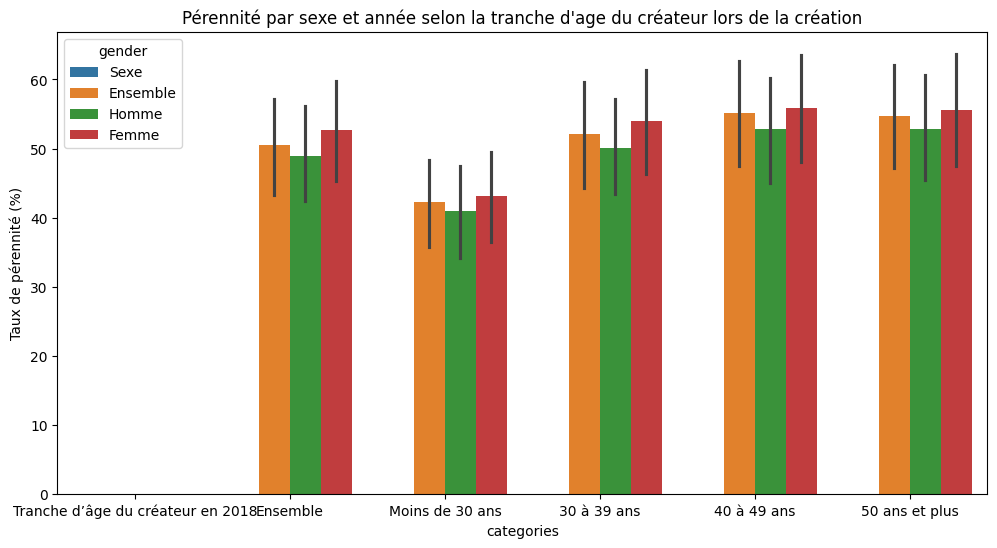

In [ ]:
plt.figure(figsize=(12, 6))

df_plot = df[df["categorie_type"] == "Tranche d’âge du créateur en 2018"]

sns.barplot(
    data=df_plot,
    x="categories", y="Taux de pérennité (%)", hue="gender"
)

plt.title("Pérennité par sexe et année selon la tranche d'age du créateur lors de la création")
plt.show()

In [44]:
fig = px.scatter(
    df_plot,
    x="categories",
    y="Taux de pérennité (%)",
    color="gender",
    animation_frame="years",
    size_max=20,
    title="Évolution de la pérennité selon le genre et la tranche d'âge",
    labels={"categories": "Tranche d'âge", "gender": "Genre"},
)

fig.update_layout(
    xaxis_tickangle=-45,
    width=1000,
    height=600,
    margin=dict(l=40, r=40, t=80, b=80)
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed